In [1]:
#1. Import libraries
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import keras

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_VJC_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,117964,118955,115981,118955,1125320
1,2019-03-04,119451,120145,118658,119847,990660
2,2019-03-05,119550,119649,118459,118955,1074790
3,2019-03-06,118955,119946,118955,119946,939310
4,2019-03-07,119946,120541,119847,120343,1014890
...,...,...,...,...,...,...
1309,2024-05-27,108300,109400,107700,109000,638400
1310,2024-05-28,109900,109900,108500,109600,686800
1311,2024-05-29,109600,109700,107300,107900,816000
1312,2024-05-30,107000,108400,107000,107000,661900


In [3]:
#3. Scaler data for RNN model
data_rnn=data.reset_index()['close']
scaler=MinMaxScaler(feature_range=(0,1))
data_rnn=scaler.fit_transform(np.array(data_rnn).reshape(-1,1))

In [4]:
#4. Split the data into train and test sets
train_size = int(0.8 * len(data_rnn))
test_size = len(data_rnn) - train_size
train_rnn = data_rnn[:train_size]
test_rnn = data_rnn[train_size:]

In [5]:
#5. Function to create a dataset for RNN model
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 [samples, time steps, features] and Y=t+100 [samples]
time_step = 100
x_train_rnn, y_train_rnn = create_dataset(train_rnn, time_step)
x_test_rnn, y_test_rnn = create_dataset(test_rnn, time_step)
x_train_rnn =x_train_rnn.reshape(x_train_rnn.shape[0],x_train_rnn.shape[1] , 1)
x_test_rnn = x_test_rnn.reshape(x_test_rnn.shape[0],x_test_rnn.shape[1] , 1)

In [7]:
#7. Proceed to define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64,input_shape=(time_step, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\THAI NGOC DUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#8. Fit model with train data
model_rnn.fit(x_train_rnn,y_train_rnn,validation_data=(x_test_rnn,y_test_rnn),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.2378 - val_loss: 0.0029
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0097 - val_loss: 0.0043
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0013 - val_loss: 9.7176e-04
Epoch 69/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 70/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010 - val_loss: 9.9243e-04
Epoch 71/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012 - val_loss: 9.6804e-04
Epoch 72/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 73/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0012 - val_loss: 9.8767e-04
Epoch 74/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0012 - val_loss: 9.8786e-04
Epoch 75/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0011 - val_loss: 9.6008e-04
Epoch 76/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 77/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 78/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 79/100
15/15 ━━━━━━━━━━━━━━━

In [9]:
#9. Predict on the test data, then perform data normalization
pred_test_rnn=model_rnn.predict(x_test_rnn)
pred_test_rnn=scaler.inverse_transform(pred_test_rnn)
check_pred_test_rnn=scaler.inverse_transform(test_rnn)[(time_step+1):]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [10]:
#10. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(pred_test_rnn,check_pred_test_rnn))
mape = mean_absolute_percentage_error(pred_test_rnn,check_pred_test_rnn) * 100
msle = mean_squared_log_error(pred_test_rnn,check_pred_test_rnn)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 2312.0824446797337
MAPE: 1.4932173944923492 %
MSLE: 0.0004668073950690325


In [11]:
#11. Predict close prices for the next 30, 60, 90 days
x_input=test_rnn[-(time_step+1):].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=time_step
i=0
while(i<90):
    
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.23913043 0.25181159 0.25362319 0.25       0.23188406 0.23007246
 0.21557971 0.2173913  0.20833333 0.20652174 0.21014493 0.19565217
 0.19021739 0.20289855 0.21376812 0.20289855 0.19746377 0.20108696
 0.21557971 0.2173913  0.21376812 0.19565217 0.21195652 0.19927536
 0.20833333 0.19384058 0.20833333 0.19384058 0.20833333 0.20652174
 0.19021739 0.17028986 0.17753623 0.18115942 0.19384058 0.17572464
 0.17391304 0.16847826 0.17210145 0.17753623 0.19202899 0.18297101
 0.18297101 0.17934783 0.16666667 0.1576087  0.15217391 0.14855072
 0.16123188 0.14492754 0.13043478 0.13405797 0.15942029 0.15217391
 0.125      0.14673913 0.16666667 0.17028986 0.16666667 0.16123188
 0.16666667 0.15217391 0.15217391 0.14673913 0.13224638 0.15217391
 0.14855072 0.13043478 0.23913043 0.2192029  0.22101449 0.17391304
 0.17210145 0.17210145 0.16304348 0.17572464 0.17572464 0.18478261
 0.18297101 0.22101449 0.35507246 0.44927536 0.42753623 0.4365942
 0.41847826 0.45289855 0.42028986 0.42572464 0.4293

7 day output [[0.18693726]]
8 day input [0.20833333 0.20652174 0.21014493 0.19565217 0.19021739 0.20289855
 0.21376812 0.20289855 0.19746377 0.20108696 0.21557971 0.2173913
 0.21376812 0.19565217 0.21195652 0.19927536 0.20833333 0.19384058
 0.20833333 0.19384058 0.20833333 0.20652174 0.19021739 0.17028986
 0.17753623 0.18115942 0.19384058 0.17572464 0.17391304 0.16847826
 0.17210145 0.17753623 0.19202899 0.18297101 0.18297101 0.17934783
 0.16666667 0.1576087  0.15217391 0.14855072 0.16123188 0.14492754
 0.13043478 0.13405797 0.15942029 0.15217391 0.125      0.14673913
 0.16666667 0.17028986 0.16666667 0.16123188 0.16666667 0.15217391
 0.15217391 0.14673913 0.13224638 0.15217391 0.14855072 0.13043478
 0.23913043 0.2192029  0.22101449 0.17391304 0.17210145 0.17210145
 0.16304348 0.17572464 0.17572464 0.18478261 0.18297101 0.22101449
 0.35507246 0.44927536 0.42753623 0.4365942  0.41847826 0.45289855
 0.42028986 0.42572464 0.42934783 0.42753623 0.37681159 0.33876812
 0.27717391 0.31884058 

15 day output [[0.18155415]]
16 day input [0.19746377 0.20108696 0.21557971 0.2173913  0.21376812 0.19565217
 0.21195652 0.19927536 0.20833333 0.19384058 0.20833333 0.19384058
 0.20833333 0.20652174 0.19021739 0.17028986 0.17753623 0.18115942
 0.19384058 0.17572464 0.17391304 0.16847826 0.17210145 0.17753623
 0.19202899 0.18297101 0.18297101 0.17934783 0.16666667 0.1576087
 0.15217391 0.14855072 0.16123188 0.14492754 0.13043478 0.13405797
 0.15942029 0.15217391 0.125      0.14673913 0.16666667 0.17028986
 0.16666667 0.16123188 0.16666667 0.15217391 0.15217391 0.14673913
 0.13224638 0.15217391 0.14855072 0.13043478 0.23913043 0.2192029
 0.22101449 0.17391304 0.17210145 0.17210145 0.16304348 0.17572464
 0.17572464 0.18478261 0.18297101 0.22101449 0.35507246 0.44927536
 0.42753623 0.4365942  0.41847826 0.45289855 0.42028986 0.42572464
 0.42934783 0.42753623 0.37681159 0.33876812 0.27717391 0.31884058
 0.25724638 0.27536232 0.28623188 0.25543478 0.23913043 0.24094203
 0.23106353 0.21819492

24 day output [[0.18708877]]
25 day input [0.19384058 0.20833333 0.19384058 0.20833333 0.20652174 0.19021739
 0.17028986 0.17753623 0.18115942 0.19384058 0.17572464 0.17391304
 0.16847826 0.17210145 0.17753623 0.19202899 0.18297101 0.18297101
 0.17934783 0.16666667 0.1576087  0.15217391 0.14855072 0.16123188
 0.14492754 0.13043478 0.13405797 0.15942029 0.15217391 0.125
 0.14673913 0.16666667 0.17028986 0.16666667 0.16123188 0.16666667
 0.15217391 0.15217391 0.14673913 0.13224638 0.15217391 0.14855072
 0.13043478 0.23913043 0.2192029  0.22101449 0.17391304 0.17210145
 0.17210145 0.16304348 0.17572464 0.17572464 0.18478261 0.18297101
 0.22101449 0.35507246 0.44927536 0.42753623 0.4365942  0.41847826
 0.45289855 0.42028986 0.42572464 0.42934783 0.42753623 0.37681159
 0.33876812 0.27717391 0.31884058 0.25724638 0.27536232 0.28623188
 0.25543478 0.23913043 0.24094203 0.23106353 0.21819492 0.20662725
 0.2049548  0.21301289 0.20139129 0.19810773 0.18693726 0.17564867
 0.18556027 0.19390427 0.

33 day output [[0.13467671]]
34 day input [0.19384058 0.17572464 0.17391304 0.16847826 0.17210145 0.17753623
 0.19202899 0.18297101 0.18297101 0.17934783 0.16666667 0.1576087
 0.15217391 0.14855072 0.16123188 0.14492754 0.13043478 0.13405797
 0.15942029 0.15217391 0.125      0.14673913 0.16666667 0.17028986
 0.16666667 0.16123188 0.16666667 0.15217391 0.15217391 0.14673913
 0.13224638 0.15217391 0.14855072 0.13043478 0.23913043 0.2192029
 0.22101449 0.17391304 0.17210145 0.17210145 0.16304348 0.17572464
 0.17572464 0.18478261 0.18297101 0.22101449 0.35507246 0.44927536
 0.42753623 0.4365942  0.41847826 0.45289855 0.42028986 0.42572464
 0.42934783 0.42753623 0.37681159 0.33876812 0.27717391 0.31884058
 0.25724638 0.27536232 0.28623188 0.25543478 0.23913043 0.24094203
 0.23106353 0.21819492 0.20662725 0.2049548  0.21301289 0.20139129
 0.19810773 0.18693726 0.17564867 0.18556027 0.19390427 0.19572923
 0.20509548 0.19470739 0.19069096 0.18155415 0.20121072 0.20896456
 0.19436447 0.19030926

41 day output [[0.10181259]]
42 day input [0.18297101 0.17934783 0.16666667 0.1576087  0.15217391 0.14855072
 0.16123188 0.14492754 0.13043478 0.13405797 0.15942029 0.15217391
 0.125      0.14673913 0.16666667 0.17028986 0.16666667 0.16123188
 0.16666667 0.15217391 0.15217391 0.14673913 0.13224638 0.15217391
 0.14855072 0.13043478 0.23913043 0.2192029  0.22101449 0.17391304
 0.17210145 0.17210145 0.16304348 0.17572464 0.17572464 0.18478261
 0.18297101 0.22101449 0.35507246 0.44927536 0.42753623 0.4365942
 0.41847826 0.45289855 0.42028986 0.42572464 0.42934783 0.42753623
 0.37681159 0.33876812 0.27717391 0.31884058 0.25724638 0.27536232
 0.28623188 0.25543478 0.23913043 0.24094203 0.23106353 0.21819492
 0.20662725 0.2049548  0.21301289 0.20139129 0.19810773 0.18693726
 0.17564867 0.18556027 0.19390427 0.19572923 0.20509548 0.19470739
 0.19069096 0.18155415 0.20121072 0.20896456 0.19436447 0.19030926
 0.18216318 0.19774356 0.20274806 0.1854644  0.18708877 0.18816169
 0.17593578 0.1744722

49 day output [[0.15558195]]
50 day input [0.13043478 0.13405797 0.15942029 0.15217391 0.125      0.14673913
 0.16666667 0.17028986 0.16666667 0.16123188 0.16666667 0.15217391
 0.15217391 0.14673913 0.13224638 0.15217391 0.14855072 0.13043478
 0.23913043 0.2192029  0.22101449 0.17391304 0.17210145 0.17210145
 0.16304348 0.17572464 0.17572464 0.18478261 0.18297101 0.22101449
 0.35507246 0.44927536 0.42753623 0.4365942  0.41847826 0.45289855
 0.42028986 0.42572464 0.42934783 0.42753623 0.37681159 0.33876812
 0.27717391 0.31884058 0.25724638 0.27536232 0.28623188 0.25543478
 0.23913043 0.24094203 0.23106353 0.21819492 0.20662725 0.2049548
 0.21301289 0.20139129 0.19810773 0.18693726 0.17564867 0.18556027
 0.19390427 0.19572923 0.20509548 0.19470739 0.19069096 0.18155415
 0.20121072 0.20896456 0.19436447 0.19030926 0.18216318 0.19774356
 0.20274806 0.1854644  0.18708877 0.18816169 0.17593578 0.17447227
 0.1651561  0.15687558 0.13865253 0.13360578 0.14169028 0.13467671
 0.13565347 0.1065515

57 day output [[0.17898916]]
58 day input [0.16666667 0.16123188 0.16666667 0.15217391 0.15217391 0.14673913
 0.13224638 0.15217391 0.14855072 0.13043478 0.23913043 0.2192029
 0.22101449 0.17391304 0.17210145 0.17210145 0.16304348 0.17572464
 0.17572464 0.18478261 0.18297101 0.22101449 0.35507246 0.44927536
 0.42753623 0.4365942  0.41847826 0.45289855 0.42028986 0.42572464
 0.42934783 0.42753623 0.37681159 0.33876812 0.27717391 0.31884058
 0.25724638 0.27536232 0.28623188 0.25543478 0.23913043 0.24094203
 0.23106353 0.21819492 0.20662725 0.2049548  0.21301289 0.20139129
 0.19810773 0.18693726 0.17564867 0.18556027 0.19390427 0.19572923
 0.20509548 0.19470739 0.19069096 0.18155415 0.20121072 0.20896456
 0.19436447 0.19030926 0.18216318 0.19774356 0.20274806 0.1854644
 0.18708877 0.18816169 0.17593578 0.17447227 0.1651561  0.15687558
 0.13865253 0.13360578 0.14169028 0.13467671 0.13565347 0.10655159
 0.09464806 0.09777332 0.09489945 0.08714507 0.10751134 0.10181259
 0.10850998 0.10354973

68 day output [[0.13424462]]
69 day input [0.2192029  0.22101449 0.17391304 0.17210145 0.17210145 0.16304348
 0.17572464 0.17572464 0.18478261 0.18297101 0.22101449 0.35507246
 0.44927536 0.42753623 0.4365942  0.41847826 0.45289855 0.42028986
 0.42572464 0.42934783 0.42753623 0.37681159 0.33876812 0.27717391
 0.31884058 0.25724638 0.27536232 0.28623188 0.25543478 0.23913043
 0.24094203 0.23106353 0.21819492 0.20662725 0.2049548  0.21301289
 0.20139129 0.19810773 0.18693726 0.17564867 0.18556027 0.19390427
 0.19572923 0.20509548 0.19470739 0.19069096 0.18155415 0.20121072
 0.20896456 0.19436447 0.19030926 0.18216318 0.19774356 0.20274806
 0.1854644  0.18708877 0.18816169 0.17593578 0.17447227 0.1651561
 0.15687558 0.13865253 0.13360578 0.14169028 0.13467671 0.13565347
 0.10655159 0.09464806 0.09777332 0.09489945 0.08714507 0.10751134
 0.10181259 0.10850998 0.10354973 0.11991615 0.13019036 0.14080335
 0.14273164 0.14768338 0.15558195 0.16663559 0.15998408 0.17396213
 0.18667424 0.1758162

78 day output [[0.15452397]]
79 day input [0.22101449 0.35507246 0.44927536 0.42753623 0.4365942  0.41847826
 0.45289855 0.42028986 0.42572464 0.42934783 0.42753623 0.37681159
 0.33876812 0.27717391 0.31884058 0.25724638 0.27536232 0.28623188
 0.25543478 0.23913043 0.24094203 0.23106353 0.21819492 0.20662725
 0.2049548  0.21301289 0.20139129 0.19810773 0.18693726 0.17564867
 0.18556027 0.19390427 0.19572923 0.20509548 0.19470739 0.19069096
 0.18155415 0.20121072 0.20896456 0.19436447 0.19030926 0.18216318
 0.19774356 0.20274806 0.1854644  0.18708877 0.18816169 0.17593578
 0.17447227 0.1651561  0.15687558 0.13865253 0.13360578 0.14169028
 0.13467671 0.13565347 0.10655159 0.09464806 0.09777332 0.09489945
 0.08714507 0.10751134 0.10181259 0.10850998 0.10354973 0.11991615
 0.13019036 0.14080335 0.14273164 0.14768338 0.15558195 0.16663559
 0.15998408 0.17396213 0.18667424 0.17581624 0.17510071 0.16843781
 0.17898916 0.17770498 0.16838367 0.15950096 0.1585426  0.15937527
 0.1520374  0.138975

86 day output [[0.19415818]]
87 day input [0.42572464 0.42934783 0.42753623 0.37681159 0.33876812 0.27717391
 0.31884058 0.25724638 0.27536232 0.28623188 0.25543478 0.23913043
 0.24094203 0.23106353 0.21819492 0.20662725 0.2049548  0.21301289
 0.20139129 0.19810773 0.18693726 0.17564867 0.18556027 0.19390427
 0.19572923 0.20509548 0.19470739 0.19069096 0.18155415 0.20121072
 0.20896456 0.19436447 0.19030926 0.18216318 0.19774356 0.20274806
 0.1854644  0.18708877 0.18816169 0.17593578 0.17447227 0.1651561
 0.15687558 0.13865253 0.13360578 0.14169028 0.13467671 0.13565347
 0.10655159 0.09464806 0.09777332 0.09489945 0.08714507 0.10751134
 0.10181259 0.10850998 0.10354973 0.11991615 0.13019036 0.14080335
 0.14273164 0.14768338 0.15558195 0.16663559 0.15998408 0.17396213
 0.18667424 0.17581624 0.17510071 0.16843781 0.17898916 0.17770498
 0.16838367 0.15950096 0.1585426  0.15937527 0.1520374  0.13897516
 0.14279762 0.14104705 0.13062739 0.13424462 0.1290535  0.12938416
 0.11621255 0.1202360

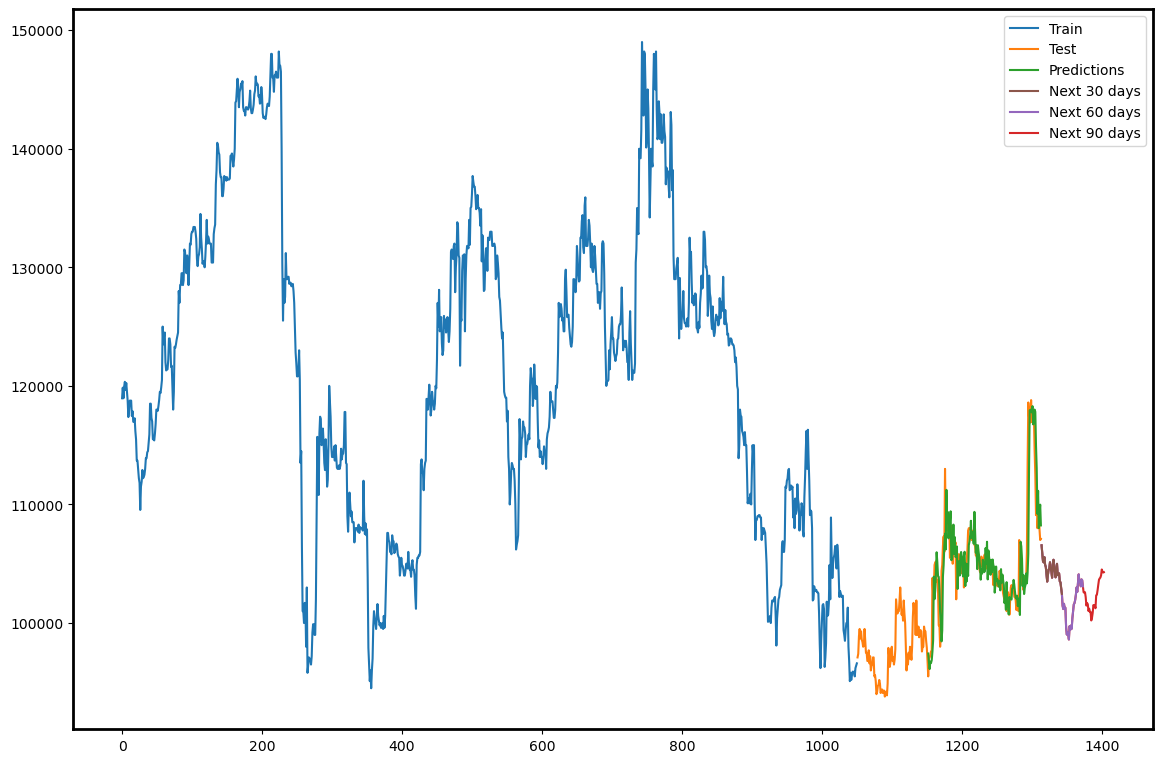

In [12]:
#12. Draw the plot
plt.figure(figsize=(12, 8))
train_index = pd.RangeIndex(start=0, stop=train_size, step=1)
line1, = plt.plot(train_index, scaler.inverse_transform(train_rnn), label="Train")

test_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
line2, = plt.plot(test_index, scaler.inverse_transform(test_rnn), label="Test")

pred_index = pd.RangeIndex(start=train_size + 101, stop=train_size + test_size, step=1)
line3, = plt.plot(pred_index, pred_test_rnn, label="Predictions")

pred90_index = pd.RangeIndex(start=len(data), stop=len(data) + 90, step=1)
line4, = plt.plot(pred90_index, scaler.inverse_transform(lst_output), label="Next 90 days")

pred60_index = pd.RangeIndex(start=len(data), stop=len(data) + 60, step=1)
line5, = plt.plot(pred60_index, scaler.inverse_transform(lst_output[:60]), label="Next 60 days")

pred30_index = pd.RangeIndex(start=len(data), stop=len(data) + 30, step=1)
line6, = plt.plot(pred30_index, scaler.inverse_transform(lst_output[:30]), label="Next 30 days")

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
    
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\RNN_VJC_82.png")
plt.show()